<CENTER><img src="../../images/ATLASOD.gif" style="width:50%"></CENTER>

# How to rediscover the Higgs boson yourself!
This notebook uses ATLAS Open Data http://opendata.atlas.cern to show you the steps to rediscover the Higgs boson yourself!

ATLAS Open Data provides open access to proton-proton collision data at the LHC for educational purposes. ATLAS Open Data resources are ideal for high-school, undergraduate and postgraduate students.

Notebooks are web applications that allow you to create and share documents that can contain for example:
1. live code
2. visualisations
3. narrative text

This analysis loosely follows the discovery of the Higgs boson by ATLAS https://arxiv.org/pdf/1207.7214.pdf (mostly Section 5 and 5.1)

By the end of this notebook you will be able to:
1. rediscover the Higgs boson yourself!
2. know some general principles of a particle physics analysis

Feynman diagram pictures are borrowed from our friends at https://www.particlezoo.net

### What is the Higgs boson?
The Higgs boson is a fundamental particle predicted by the Standard Model. 
It is a manifestation of the Higgs field,
    which gives mass to the fundamental particles.
However,
    it is incredibly hard to produce.
At the LHC, 
    a Higgs particle is produced about once every 10 billion collisions!
This tiny fraction makes it very difficult to detect.
Nevertheless, 
    after years of data collection, 
    the Higgs boson was finally discovered in 2012 by CMS and ATLAS experiments at CERN.
In this tutorial, 
    we shall be following their example. 

### Detecting the Higgs
#TO MODIFY
This analysis loosely follows the [discovery of the Higgs boson by ATLAS](https://www.sciencedirect.com/science/article/pii/S037026931200857X) (Section 5).
The Standard Model predicts that,
    shortly after being produced,
    the Higgs decays into various products: photons, Z bosons, quarks, etc.,
    all with different probabilities.
We'll be looking at one particular decay channel:
$$H \rightarrow \gamma\gamma$$

<CENTER><img src="images/feynman_diagrams/Hyy_feynman.png" style="width:40%"></CENTER>


We refer to this as our desired signal.
Ideally,
    we would search for collisions which yielded two photons as products and this would tell us that a Higgs boson is present.
Unfortunately,
    in addition to our signal,
    
We can get around this by accounting for the total invariant mass of the photon products.
We know through conservation of energy and momentum that the invariant mass of the products must be equal to the Higgs mass,
    while other background processes will have different invariant masses.
Our last step would be to plot the invariant mass of each event and spot the peak in mass around 125 GeV,
    which corresponds to the mass of the Higgs boson.

By the end of this notebook you will be able to:
1. Learn to process large data sets using cuts
2. Understand some general principles of a particle physics analysis
3. Discover the Higgs boson!

### Running a Python notebook
A Python notebook consists of cell blocks, 
    each containing lines of Python code.
Each cell can be run independently of each other,
    yielding respective outputs below the cells.
Conventionally,
    cells are run in order from top to bottom.


- To run the whole notebook, in the top menu click Cell $\to$ Run All.

- To propagate a change you've made to a piece of code, click Cell $\to$ Run All Below.

- You can also run a single code cell, by clicking Cell $\to$ Run Cells, or using the keyboard shortcut Shift+Enter.

## ATLAS Open Data Initialisation

### First time package installation on your computer (not needed on mybinder)
This first cell installs the required python packages.
It only needs to be run the first time you open this notebook on your computer. 
If you close Jupyter and re-open on the same computer, you won't need to run this first cell again.
PYTHON OR JUPYTER
If this is opened on mybinder, you don't need to run this cell.

In [187]:
#import sys
#!{sys.executable} -m pip install --upgrade --user pip # update the pip package installer
#!{sys.executable} -m pip install -U numpy==2.0.0 pandas==2.2.2 uproot==5.3.9 matplotlib==3.9.0 lmfit==1.3.1 awkward-pandas==2023.8.0 aiohttp==3.9.5 requests==2.32.3 --user # install required packages
#import sys
#!{sys.executable} -m pip install nbconvert PyPDF2

### To setup everytime
Cell -> Run All Below

to be done every time you re-open this notebook

We're going to be using a number of tools to help us:
* uproot: lets us read .root files typically used in particle physics into data formats used in python
* pandas: lets us store data as dataframes, a format widely used in python
* numpy: provides numerical calculations such as histogramming
* matplotlib: common tool for making plots, figures, images, visualisations
* lmfit: tool for statistical fitting

In [188]:
import uproot # for reading .root files
import pandas as pd # to store data as dataframe
import time # to measure time to analyse
import math # for mathematical functions such as square root
import awkward as ak #TO COMMENT
import numpy as np # # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting
from matplotlib.ticker import MaxNLocator,AutoMinorLocator # for minor ticks
from lmfit.models import PolynomialModel, GaussianModel # for the signal and background fits
import vector #to use vectors
import requests # for HTTP access
import aiohttp # HTTP client support

Unit definitions, as stored in the data files

In [192]:
MeV = 0.001
GeV = 1.0
#MAYBE JUST TAKE OUT

## Lumi, fraction, file path
FIGURE OUT WERE TO PUT THIS

General definitions of luminosity, fraction of data used, where to access the input files

In [172]:
#lumi = 0.5 # fb-1 # data_A only
#lumi = 1.9 # fb-1 # data_B only
#lumi = 2.9 # fb-1 # data_C only
#lumi = 4.7 # fb-1 # data_D only
lumi = 10 # fb-1 # data_A,data_B,data_C,data_D

fraction = 1 # reduce this is you want the code to run quicker


<a id='samples'></a>

## Example 1: Reading data 


We would like to read some of the data from the open dataset.

In [173]:
# CERN open database URL
path = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/GamGam/Data/"

NEED AN EXPLANATION

In [190]:
samples_list = ['data_A','data_B','data_C','data_D']

Let's try accessing `data_A` in the CERN database URL as an example. Note that the datasets used in this notebook have already been filtered to include 2 photons per event.

In [191]:
# Print the samples dict for the key 'data'
print(samples_list[0])

# This is now appended to our file path to retrieve the data_A.GamGam.root file
data_A_path = path + samples_list[0] + ".GamGam.root"

data_A


Next, we shall try opening the `data_A` file to see what is inside.
In the file (called a `tree`),
    there are 430344 entries, 
    one for each event.
In each event,
    a dictionary stores all the relevant information as keys, such as the event number (`eventNumber`), the photon transverse momentum (`photon_pt`), etc.  

More information on trees can be viewed [here](https://masonproffitt.github.io/uproot-tutorial/03-trees/index.html).

In [176]:
# Accessing the file from the online database (":mini" opens the tree in a desired manner)
with uproot.open(data_A_path + ":mini") as t:
    tree = t

# There are 430344 entries in the tree
print("The number of entries in the tree are:", tree.num_entries)

# We can view all the information stored in the tree using the .keys() method.
print("The information stored in the tree is:", tree.keys())

# We can also view the entire tree using the .arrays() method
# This generates a 430344-entry list of dictionaries
print(tree.arrays()) 

The number of entries in the tree are: 430344
The information stored in the tree is: ['runNumber', 'eventNumber', 'channelNumber', 'mcWeight', 'scaleFactor_PILEUP', 'scaleFactor_ELE', 'scaleFactor_MUON', 'scaleFactor_PHOTON', 'scaleFactor_TAU', 'scaleFactor_BTAG', 'scaleFactor_LepTRIGGER', 'scaleFactor_PhotonTRIGGER', 'trigE', 'trigM', 'trigP', 'lep_n', 'lep_truthMatched', 'lep_trigMatched', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_E', 'lep_z0', 'lep_charge', 'lep_type', 'lep_isTightID', 'lep_ptcone30', 'lep_etcone20', 'lep_trackd0pvunbiased', 'lep_tracksigd0pvunbiased', 'met_et', 'met_phi', 'jet_n', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_E', 'jet_jvt', 'jet_trueflav', 'jet_truthMatched', 'jet_MV2c10', 'photon_n', 'photon_truthMatched', 'photon_trigMatched', 'photon_pt', 'photon_eta', 'photon_phi', 'photon_E', 'photon_isTightID', 'photon_ptcone30', 'photon_etcone20', 'photon_convType', 'tau_n', 'tau_pt', 'tau_eta', 'tau_phi', 'tau_E', 'tau_isTightID', 'tau_truthMatched', 'tau_trigMatched', '

Perhaps we'd like to see the energies of the photons. 
We can access this from our tree using the key `photon_E`. 

In [177]:
tree["photon_E"].arrays()

<Array [{photon_E: [1.42e+05, ...]}, ...] type='430344 * {photon_E: var * f...'>

In our analysis, 
    not all the information in the tree is important.
We can store the important variables in a list and retrieve them from the tree later on.
As it turns out, 
    we will need the following set of variables:

In [179]:
variables = ["photon_pt","photon_eta","photon_phi","photon_E",
                            "photon_isTightID","photon_etcone20"]

Now that we understand how to access the information in the `data_A` tree,
    we can begin analysis.
As mentioned in the introduction,
    there are two key steps to be completed for each event entry:
1. **Cuts** - we need to account for photons selection rules in the event. 
In the [paper](https://www.sciencedirect.com/science/article/pii/S037026931200857X), 
    it is stated that:
- "Photon candidates are required to pass identification criteria". This is because sometimes jets and other particles that might mimic photon signals are misidentified as photons.
- "The leading (sub-leading) photon candidate is required to have E_t > 40 GeV (30 GeV)". This is because background processes often produce photons with lower E_t, so setting higher thresholds enhances the signal-to-noise ratio.
- "Photon candidates are required to have an isolation transverse energy of less than 4 GeV" to make sure the photons detected are not from jets and "exclude the calorimeter barrel/end-cap transition region 1.37 < |η| < 1.52" to finish.
The datasets used in this notebook have already been filtered to include 2 photons per event.
We need to filter the data such that in each event, the criterias mentioned above is satisfied.

2. **Mass calculation** - the data to be plotted is the 4-lepton invariant mass, which can be found using the equation: $$m_\text{4l} = \sqrt{E^2_\text{tot}-\mathbf{p}_\text{tot}\cdot\mathbf{p}_\text{tot}}$$
in units where $c=1$.
$E_\text{tot}$ is the total energy and $\mathbf{p}_\text{tot}$ is the total momentum.
This calculation is performed using the vector array method `.M` on the sum of lepton 4-momenta (`lep_pt`,`lep_eta`,`lep_phi`,`lep_E`).

From this,
    we can see why we chose those six important variables earlier. 
Let's try to perform this two-step analysis for one event in `data_A`.

In [180]:
# This selects the first entry of the tree
entry = tree.arrays(library="ak")[:1]

# Cut on photon reconstruction quality
photon_reconstruction = entry['photon_isTightID']
# isTightID==True means a photon identified as being well reconstructed, we want to keep events which have True for both photons
photon_reconstruction_cut_bool = (photon_reconstruction[:, 0] == False) | (photon_reconstruction[:, 1]==False)
print(f"Cut for photon reconstruction quality?{photon_reconstruction_cut_bool}")
    
# Cut on Transverse momentum
# paper: "The leading (sub-leading) photon candidate is required to have E_T (transverse momentum?) > 40 GeV (30 GeV)
photon_pt = entry['photon_pt']
#We want to keep events where photon_pt[0]>40000 MeV and photon_pt[1]>30000 MeV
photon_pt_cut_bool = (photon_pt[:,0] < 40000) | (photon_pt[:,1] < 30000)
print(f"Cut for the energy of the photons? {photon_pt_cut_bool}")

# Cut on energy isolation
# paper: "Photon candidates are required to have an isolation transverse energy of less than 4 GeV"
photon_etcone20 = entry['photon_etcone20']
# want to keep events where isolation eT<4000 MeV
photon_etcone20_cut_bool = (photon_etcone20[:,0] > 4000) | (photon_etcone20[:,1] > 4000)
print(f"Cut for the isolation transverse energy? {photon_etcone20_cut_bool}")


# Cut on pseudorapidity in barrel/end-cap transition region
# paper: "excluding the calorimeter barrel/end-cap transition region 1.37 < |η| < 1.52"
photon_eta = entry['photon_eta']
# want to keep events where modulus of photon_eta is outside the range 1.37 to 1.52
condition_0 = (np.abs(photon_eta[:, 0]) < 1.52) & (np.abs(photon_eta[:, 0]) > 1.37)
condition_1 = (np.abs(photon_eta[:, 1]) < 1.52) & (np.abs(photon_eta[:, 1]) > 1.37)
photon_eta_cut_bool = (condition_0 | condition_1)
print(f"Cut for the eta values? {photon_eta_cut_bool}")

# Calculate invariant mass of the 2-photon state
p4 = vector.zip({"pt": entry['photon_pt'], "eta": entry['photon_eta'], "phi": entry['photon_phi'], "E": entry['photon_E']})
invariant_mass = (p4[:, 0] + p4[:, 1]).M * MeV # .M calculates the invariant mass
print(f"Invariant mass: {invariant_mass}")


Cut for photon reconstruction quality?[True]
Cut for the energy of the photons? [True]
Cut for the isolation transverse energy? [False]
Cut for the eta values? [False]
Invariant mass: [170]


Based on our analysis, this entry should be removed because the photons do not match our requirements.
We can turn these checks and calculations into a set of functions.

In [181]:
# Cut on photon reconstruction quality
# paper: "Photon candidates are required to pass identification criteria"
def cut_photon_reconstruction(photon_isTightID):
# isTightID==True means a photon identified as being well reconstructed
# want to keep events where True for both photons
# first photon is [0], 2nd photon is [1] etc

    #print("First photon:", photon_isTightID)
    
    #return (photon_isTightID[:,0]==True) & (photon_isTightID[:,1]==True)

       return (photon_isTightID[:,0]==False) | (photon_isTightID[:,1]==False)

    
# Cut on Transverse momentum
# paper: "The leading (sub-leading) photon candidate is required to have E_T (transverse momentum?) > 40 GeV (30 GeV)"
def cut_photon_pt(photon_pt):
# want to keep events where photon_pt[0]>40000 MeV and photon_pt[1]>30000 MeV
    
    return (photon_pt[:,0] < 40000) | (photon_pt[:,1] < 30000)


# Cut on energy isolation
# paper: "Photon candidates are required to have an isolation transverse energy of less than 4 GeV"
def cut_isolation_et(photon_etcone20):
# want to keep events where isolation eT<4000 MeV
    
    return (photon_etcone20[:,0] > 4000) | (photon_etcone20[:,1] > 4000)

# Cut on pseudorapidity in barrel/end-cap transition region
# paper: "excluding the calorimeter barrel/end-cap transition region 1.37 < |η| < 1.52"
def cut_photon_eta_transition(photon_eta):
# want to keep events where modulus of photon_eta is outside the range 1.37 to 1.52
    condition_0 = (np.abs(photon_eta[:, 0]) < 1.52) & (np.abs(photon_eta[:, 0]) > 1.37)
    condition_1 = (np.abs(photon_eta[:, 1]) < 1.52) & (np.abs(photon_eta[:, 1]) > 1.37)
    
    return condition_0 | condition_1

    #return ((np.abs(photon_eta[:,0]) > 1.52 | np.abs(photon_eta[:,0]) < 1.37) & (np.abs(photon_eta[:,1]) > 1.52 | np.abs(photon_eta[:,1]) < 1.37))

# Calculate invariant mass of the 2-photon state
# [:, i] selects the i-th lepton in each event
def calc_mass(photon_pt, photon_eta, photon_phi, photon_E):
    p4 = vector.zip({"pt": photon_pt, "eta": photon_eta, "phi": photon_phi, "E": photon_E})
    invariant_mass = (p4[:, 0] + p4[:, 1]).M * MeV # .M calculates the invariant mass
    return invariant_mass

You may verify on your own that these functions give the same outputs as the previous code block.
Now, 
    we shall apply these functions over the entire data tree using a `for` loop.

In [182]:
# Define empty list to hold all data for this sample
sample_data = []

# Perform the cuts for each data entry in the tree
for data in tree.iterate(variables, library="ak"):
    
    # We can use data[~boolean] to remove entries from the data set
    photon_isTightID = data['photon_isTightID']
    data = data[~cut_photon_reconstruction(photon_isTightID)]
    
    # want to keep events where photon_pt[0]>40000 MeV and photon_pt[1]>30000 MeV
    photon_pt = data['photon_pt']
    data = data[~cut_photon_pt(photon_pt)]

    photon_etcone20 = data['photon_etcone20']
    data = data[~cut_isolation_et(photon_etcone20)]

    photon_eta = data['photon_eta']
    #print("Before the cut:", data.photon_eta)
    data = data[~cut_photon_eta_transition(photon_eta)]
    #print("After the cut:", data.photon_eta)

    data['mass'] = calc_mass(data['photon_pt'], data['photon_eta'], data['photon_phi'], data['photon_E'])

    # Append data to the whole sample data list
    sample_data.append(data)

# turns sample_data back into an awkward array
data_A = ak.concatenate(sample_data)

We can now plot the data using Matplotlib. 
The data will be turned into a histogram,
    with bins of width 5 GeV.
Note that much of the code written here is meant for the aesthetics of the plot.

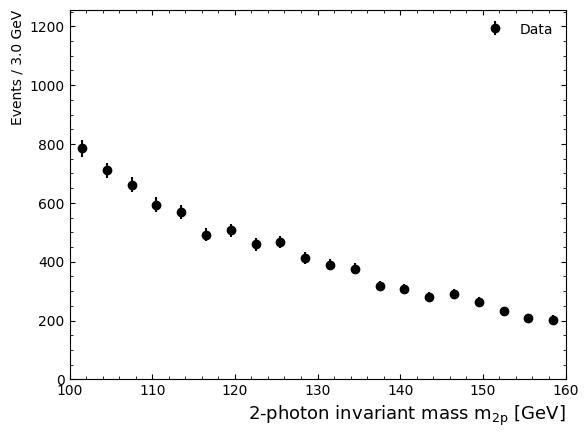

In [183]:
# x-axis range of the plot
xmin = 100 * GeV
xmax = 160 * GeV

# Histogram bin setup
step_size = 3 * GeV
bin_edges = np.arange(start=xmin, # The interval includes this value
                    stop=xmax+step_size, # The interval doesn't include this value
                    step=step_size ) # Spacing between values
bin_centres = np.arange(start=xmin+step_size/2, # The interval includes this value
                        stop=xmax+step_size/2, # The interval doesn't include this value
                        step=step_size ) # Spacing between values

# Creating histogram from data
data_x,_ = np.histogram(ak.to_numpy(data_A['mass']), 
                        bins=bin_edges ) # histogram the data
data_x_errors = np.sqrt( data_x ) # statistical error on the data

# *************
# Main plot 
# *************
main_axes = plt.gca() # get current axes

# plot the data points
main_axes.errorbar(x=bin_centres, y=data_x, yerr=data_x_errors,
                    fmt='ko', # 'k' means black and 'o' is for circles 
                    label='Data') 

# set the x-limit of the main axes
main_axes.set_xlim( left=xmin, right=xmax ) 

# separation of x axis minor ticks
main_axes.xaxis.set_minor_locator( AutoMinorLocator() ) 

# set the axis tick parameters for the main axes
main_axes.tick_params(which='both', # ticks on both x and y axes
                        direction='in', # Put ticks inside and outside the axes
                        top=True, # draw ticks on the top axis
                        right=True ) # draw ticks on right axis

# x-axis label
main_axes.set_xlabel(r'2-photon invariant mass $\mathrm{m_{2p}}$ [GeV]',
                    fontsize=13, x=1, horizontalalignment='right' )

# write y-axis label for main axes
main_axes.set_ylabel('Events / '+str(step_size)+' GeV',
                        y=1, horizontalalignment='right') 

# set y-axis limits for main axes
main_axes.set_ylim( bottom=0, top=np.amax(data_x)*1.6 )

# add minor ticks on y-axis for main axes
main_axes.yaxis.set_minor_locator( AutoMinorLocator() ) 

# draw the legend
main_axes.legend( frameon=False ); # no box around the legend

Great,
    we managed to plot `data_A`! 
Now that we have understood how to manage the data, apply the cuts and calculate the mass, we can proceed to analyze the data!

## Final Analysis

First, let's apply the cuts and mass calculations to all the data.

In [184]:
# Set luminosity to 10 fb-1 for all data I CAN TAKE THIS OUT ASK
lumi = 20
# number of events

# Controls the fraction of all events analysed HOW DOES THIS WORK
fraction = 0.2 # reduce this is if you want quicker runtime (implemented in the loop over the tree)

all_data = []
sample_data = []

# Loop over each file
for val in samples_list: 

    # Print which sample is being processed
    print('Processing '+val+' samples')

    fileString = path + val + ".GamGam.root" # file name to open

    # Open file
    with uproot.open(fileString + ":mini") as t:
        tree = t
    
    
    numevents = tree.num_entries

    # Perform the cuts for each data entry in the tree and calculate the invariant mass
    for data in tree.iterate(variables, library="ak", entry_stop=numevents*fraction):
 
        photon_isTightID = data['photon_isTightID']
        data = data[~cut_photon_reconstruction(photon_isTightID)]
        
        photon_pt = data['photon_pt']
        data = data[~cut_photon_pt(photon_pt)]

        photon_etcone20 = data['photon_etcone20']
        data = data[~cut_isolation_et(photon_etcone20)]

        photon_eta = data['photon_eta']
        data = data[~cut_photon_eta_transition(photon_eta)]

        data['mass'] = calc_mass(data['photon_pt'], data['photon_eta'], data['photon_phi'], data['photon_E'])

        # Append data to the whole sample data list
        sample_data.append(data)
           
# turns sample_data back into an awkward array
all_data = ak.concatenate(sample_data)

Processing data_A samples
Processing data_B samples
Processing data_C samples
Processing data_D samples


We are now ready to fit our data, to effectively see the Higgs boson! To do so we will fit the data with a 4th order polynomial with a gaussian. The polynomial funtion represents the background, instead the gaussian represents our signal.

In [185]:

data_x,_ = np.histogram(ak.to_numpy(all_data['mass']), 
                            bins=bin_edges ) # histogram the data
data_x_errors = np.sqrt( data_x ) # statistical error on the data


# data fit
polynomial_mod = PolynomialModel( 4 ) # 4th order polynomial
gaussian_mod = GaussianModel() # Gaussian



# set initial guesses for the parameters of the polynomial model
# c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
pars = polynomial_mod.guess(data_x, # data to use to guess parameter values
                            x=bin_centres, c0=data_x.max(), c1=0,
                            c2=0, c3=0, c4=0 )

# set initial guesses for the parameters of the Gaussian model
pars += gaussian_mod.guess(data_x, # data to use to guess parameter values
                        x=bin_centres, amplitude=100, 
                        center=125, sigma=2 )

model = polynomial_mod + gaussian_mod # combined model

# fit the model to the data
out = model.fit(data_x, # data to be fit
                pars, # guesses for the parameters
                x=bin_centres, weights=1/data_x_errors ) #ASK

# background part of fit
params_dict = out.params.valuesdict() # get the parameters from the fit to data
c0 = params_dict['c0'] # c0 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
c1 = params_dict['c1'] # c1 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
c2 = params_dict['c2'] # c2 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
c3 = params_dict['c3'] # c3 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
c4 = params_dict['c4'] # c4 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4

# get the background only part of the fit to data
background = c0 + c1*bin_centres + c2*bin_centres**2 + c3*bin_centres**3 + c4*bin_centres**4

# data fit - background fit = signal fit
signal_x = data_x - background 

Let's now 

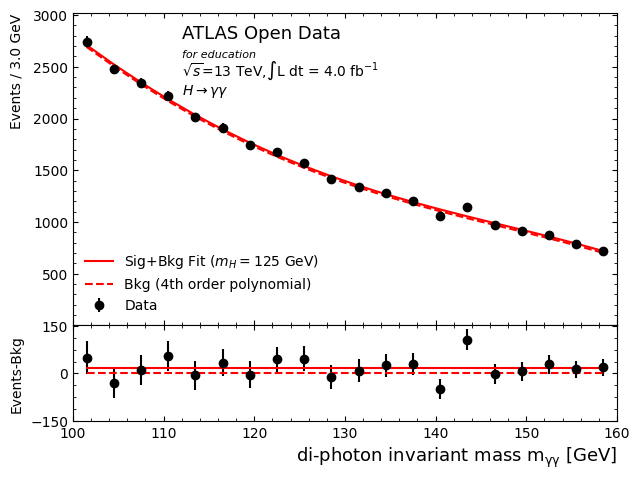

In [186]:
# *************
# Main plot 
# *************
plt.axes([0.1,0.3,0.85,0.65]) # left, bottom, width, height 
main_axes = plt.gca() # get current axes

# plot the data points
main_axes.errorbar(x=bin_centres, y=data_x, yerr=data_x_errors, 
                fmt='ko', # 'k' means black and 'o' means circles
                label='Data' ) 

# plot the signal + background fit
main_axes.plot(bin_centres, # x
            out.best_fit, # y
            '-r', # single red line
            label='Sig+Bkg Fit ($m_H=125$ GeV)' )

# plot the background only fit
main_axes.plot(bin_centres, # x
            background, # y
            '--r', # dashed red line
            label='Bkg (4th order polynomial)' )

# set the x-limit of the main axes
main_axes.set_xlim( left=xmin, right=xmax ) 

# separation of x-axis minor ticks
main_axes.xaxis.set_minor_locator( AutoMinorLocator() ) 

# set the axis tick parameters for the main axes
main_axes.tick_params(which='both', # ticks on both x and y axes
                    direction='in', # Put ticks inside and outside the axes
                    top=True, # draw ticks on the top axis
                    labelbottom=False, # don't draw tick labels on bottom axis
                    right=True ) # draw ticks on right axis

# write y-axis label for main 
main_axes.set_ylabel('Events / '+str(step_size)+' GeV', 
                    horizontalalignment='right') 

# set the y-axis limit for the main axes
main_axes.set_ylim( bottom=0, top=np.amax(data_x)*1.1 ) 

# set minor ticks on the y-axis of the main axes
main_axes.yaxis.set_minor_locator( AutoMinorLocator() ) 

# avoid displaying y=0 on the main axes
main_axes.yaxis.get_major_ticks()[0].set_visible(False) 

# Add text 'ATLAS Open Data' on plot
plt.text(0.2, # x
        0.92, # y
        'ATLAS Open Data', # text
        transform=main_axes.transAxes, # coordinate system used is that of main_axes
        fontsize=13 ) 

# Add text 'for education' on plot
plt.text(0.2, # x
        0.86, # y
        'for education', # text
        transform=main_axes.transAxes, # coordinate system used is that of main_axes
        style='italic',
        fontsize=8 ) 

# Add energy and luminosity
lumi_used = str(lumi*fraction) # luminosity to write on the plot
plt.text(0.2, # x
        0.8, # y
        '$\sqrt{s}$=13 TeV,$\int$L dt = '+lumi_used+' fb$^{-1}$', # text
        transform=main_axes.transAxes ) # coordinate system used is that of main_axes 

# Add a label for the analysis carried out
plt.text(0.2, # x
        0.74, # y
        r'$H \rightarrow \gamma\gamma$', # text 
        transform=main_axes.transAxes ) # coordinate system used is that of main_axes

# draw the legend
main_axes.legend(frameon=False, # no box around the legend
                loc='lower left' ) # legend location 


# *************
# Data-Bkg plot 
# *************
plt.axes([0.1,0.1,0.85,0.2]) # left, bottom, width, height
sub_axes = plt.gca() # get the current axes

# set the y axis to be symmetric about Data-Background=0
sub_axes.yaxis.set_major_locator( MaxNLocator(nbins='auto', 
                                            symmetric=True) )

# plot Data-Background
sub_axes.errorbar(x=bin_centres, y=signal_x, yerr=data_x_errors,
                fmt='ko' ) # 'k' means black and 'o' means circles

# draw the fit to data
sub_axes.plot(bin_centres, # x
            out.best_fit-background, # y
            '-r' ) # single red line

# draw the background only fit
sub_axes.plot(bin_centres, # x
            background-background, # y
            '--r' )  # dashed red line

# set the x-axis limits on the sub axes
sub_axes.set_xlim( left=xmin, right=xmax ) 

# separation of x-axis minor ticks
sub_axes.xaxis.set_minor_locator( AutoMinorLocator() ) 

# x-axis label
sub_axes.set_xlabel(r'di-photon invariant mass $\mathrm{m_{\gamma\gamma}}$ [GeV]',
                    x=1, horizontalalignment='right', 
                    fontsize=13 ) 

# set the tick parameters for the sub axes
sub_axes.tick_params(which='both', # ticks on both x and y axes
                    direction='in', # Put ticks inside and outside the axes
                    top=True, # draw ticks on the top axis
                    right=True ) # draw ticks on right axis 

# separation of y-axis minor ticks
sub_axes.yaxis.set_minor_locator( AutoMinorLocator() ) 

# y-axis label on the sub axes
sub_axes.set_ylabel( 'Events-Bkg' ) 


# Generic features for both plots
main_axes.yaxis.set_label_coords( -0.09, 1 ) # x,y coordinates of the y-axis label on the main axes
sub_axes.yaxis.set_label_coords( -0.09, 0.5 ) # x,y coordinates of the y-axis label on the sub axes

[Back to contents](#contents)

## What can you do to explore this analysis?

* Increase the fraction of data used in '[Lumi, fraction, file path](#fraction)'
* Use data_B, data_C and data_D in '[Samples](#samples)'
* Check how many events are being thrown away by each cut in '[Applying a cut](#applying_cut)'
* Add more cuts from the [Higgs discovery paper](https://www.sciencedirect.com/science/article/pii/S037026931200857X#se0090) in '[Changing a cut](#changing_cut)' and '[Applying a cut](#applying_cut)'
* Find the reduced chi-squared for the fit in '[Plotting](#plotting)'
* Find the mean of the fitted Gaussian in '[Plotting](#plotting)'
* Find the width of the fitted Gaussian in '[Plotting](#plotting)'
* Try different initial guesses for the parameters of the fit in '[Plotting](#plotting)'
* Try different functions for the fit in '[Plotting](#plotting)'
* Your idea!

[Back to contents](#contents)